# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
df = pd.read_csv("breast-cancer-wisconsin-data.csv")
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [49]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [3]:
df.shape

(699, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [0]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [5]:
df.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [0]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [6]:
df.select_dtypes(include = "object").columns

Index(['Bare Nuclei'], dtype='object')

In [7]:
df["Bare Nuclei"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [ ]:
### We find that there is '?' which is used as a placeholder for missing values. Lest remove these entries.

In [8]:
df["Bare Nuclei"].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [0]:
16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [39]:
# df1["Bare Nuclei"].mode()

In [10]:
df1 = df
df1["Bare Nuclei"] = df1["Bare Nuclei"].replace("?", df1["Bare Nuclei"].mode()[0] )
df1["Bare Nuclei"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [ ]:
# We see the Bare Nuclei data is still an object type and not float. So lets change this datatype

In [11]:
df1["Bare Nuclei"] = df1["Bare Nuclei"].astype('int')
df1.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [12]:
df1.duplicated().sum()

9

In [13]:
# duplicateRowsDF1 = df1[df1.duplicated()]
 
# print("Duplicate Rows except first occurrence based on all columns are :")
# print(duplicateRowsDF1)

In [14]:
print("No of records before dropping duplicate")
print(df1.shape)
df1 = df1.drop_duplicates()
print("No of records after dropping duplicate")
print(df1.shape)

No of records before dropping duplicate
(699, 11)
No of records after dropping duplicate
(690, 11)


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [0]:
# Check for correlation of variable

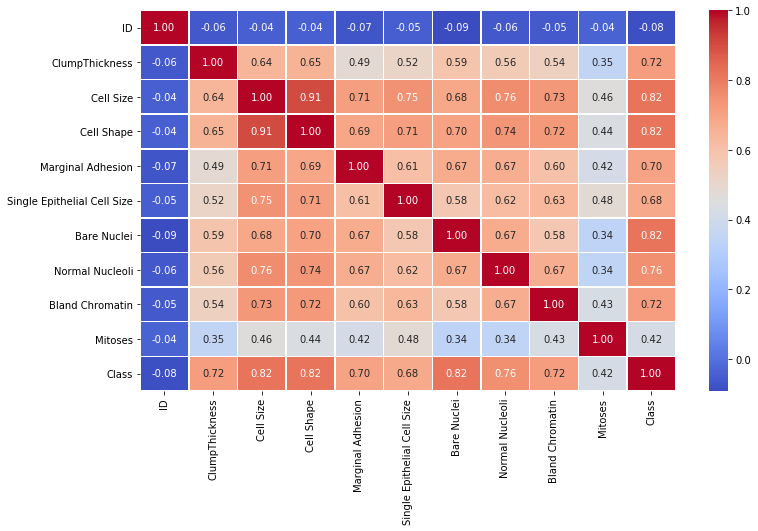

In [17]:
fig, axes = plt.subplots(figsize=(12,7))
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(data=df1.corr(), cmap='coolwarm', annot=True, fmt = ".2f", linewidths=.5, ax=axes)
plt.show()

In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [0]:
#Let us check for pair plots

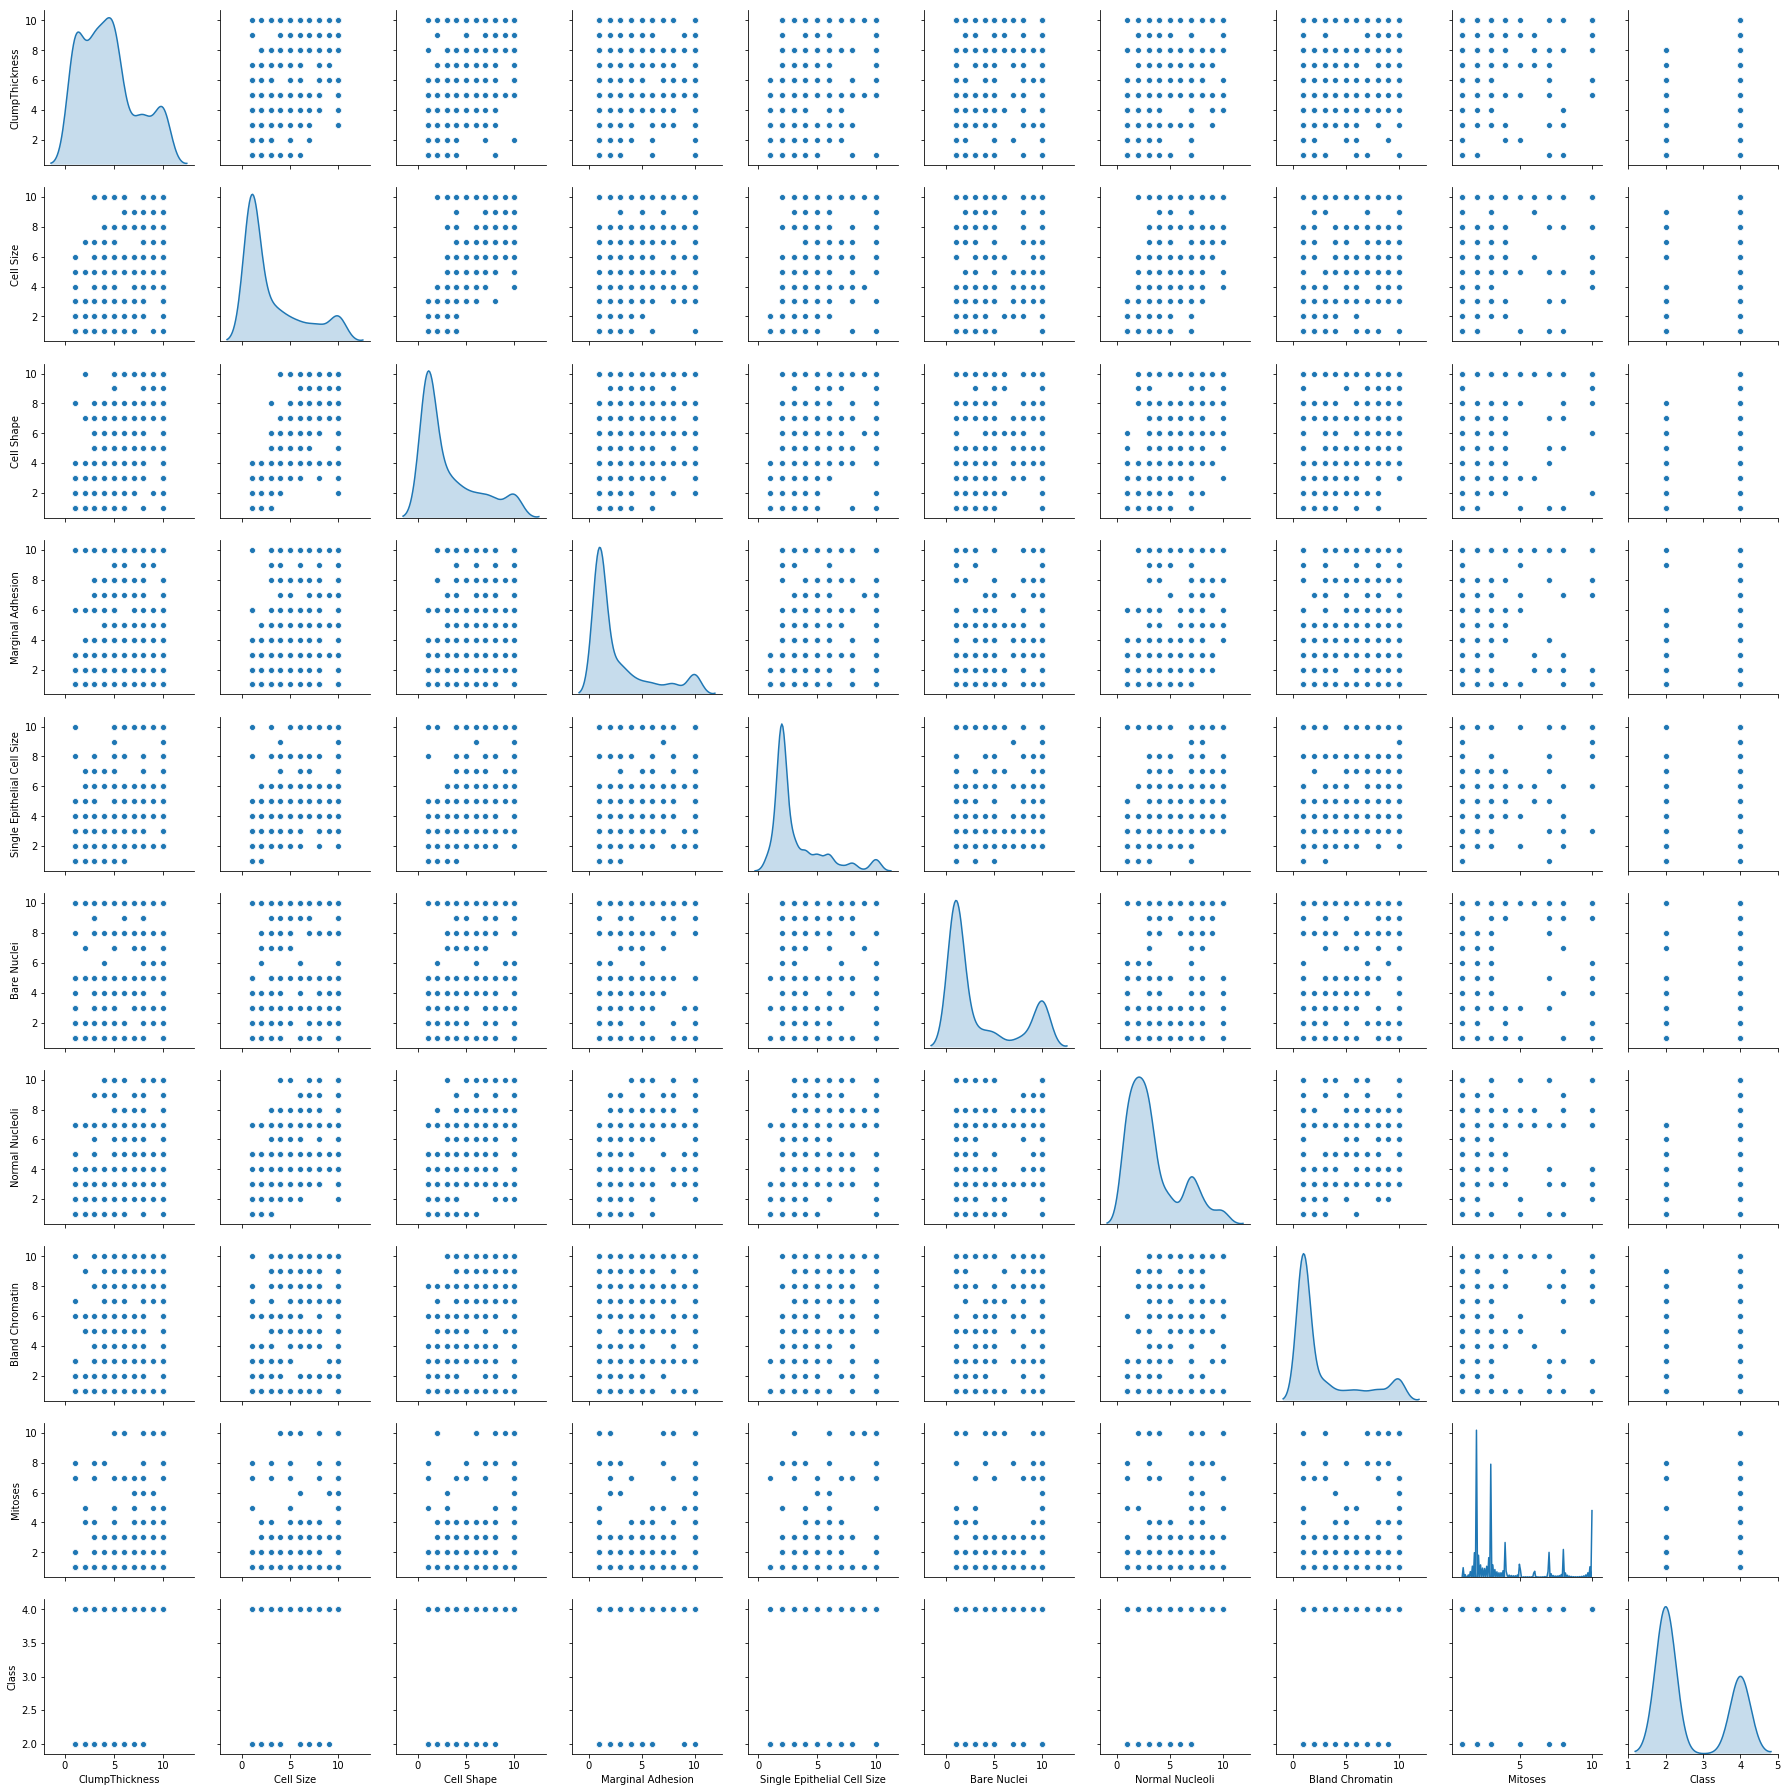

In [22]:
sns.pairplot(df1.iloc[:,1:11],diag_kind="kde")

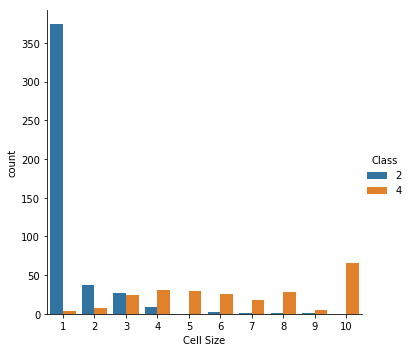

In [23]:
sns.catplot(x= "Cell Size", kind="count",hue = 'Class', data=df1)

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

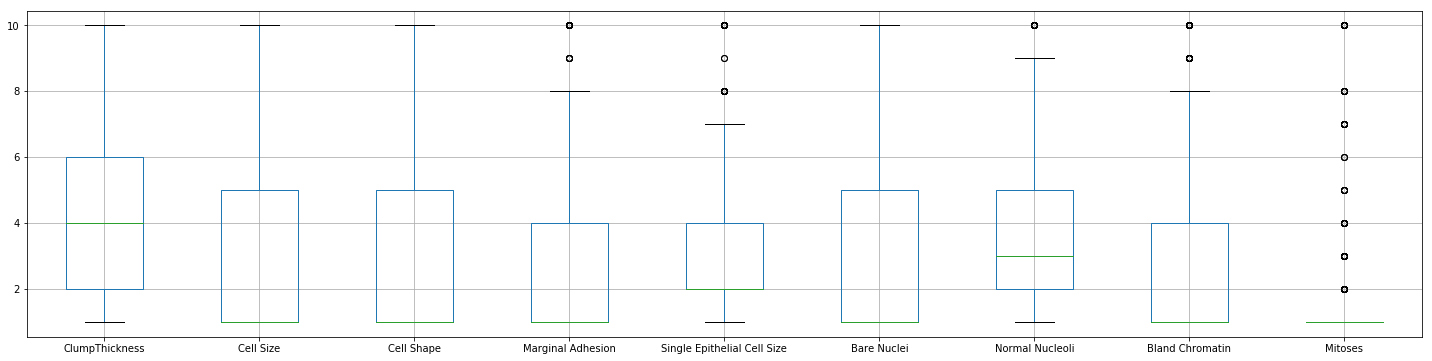

In [24]:
df1.iloc[:,1:10].boxplot(figsize=(25,6))

In [25]:
pd.crosstab(df1['Marginal Adhesion'],df1['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [26]:
df1['Marginal Adhesion'] = np.where(df1['Marginal Adhesion']>4,4,df1['Marginal Adhesion'])

C:\Users\raj_lodha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
pd.crosstab(df1['Single Epithelial Cell Size'],df1['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [28]:
df1['Single Epithelial Cell Size'] = np.where(df1['Single Epithelial Cell Size']>4,4,df1['Single Epithelial Cell Size'])

C:\Users\raj_lodha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
pd.crosstab(df1['Bland Chromatin'],df1['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [30]:
df1['Bland Chromatin'] = np.where(df1['Bland Chromatin']>4,4,df1['Bland Chromatin'])

C:\Users\raj_lodha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
pd.crosstab(df1['Mitoses'],df1['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [32]:
df1['Mitoses'] = np.where(df1['Mitoses']>1,1,df1['Mitoses'])

C:\Users\raj_lodha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
# We could see most of the outliers are now removed.

# Q6 Create a covariance matrix for identifying Principal components

In [0]:
# PCA
# Step 1 - Create covariance matrix

In [35]:
X = df1.iloc[:,1:10].values
y = df1.iloc[:,10].values
# standardize the data
from sklearn.preprocessing import StandardScaler
X_sd = StandardScaler().fit_transform(X)

C:\Users\raj_lodha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\raj_lodha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [37]:
cov_matrix = np.cov(X_sd.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00145138 0.64410677 0.65453792 0.55329897 0.58388619 0.59150555
  0.56187702 0.57214901 0.        ]
 [0.64410677 1.00145138 0.9066632  0.72204998 0.77320789 0.68556472
  0.76073447 0.72684553 0.        ]
 [0.65453792 0.9066632  1.00145138 0.7042574  0.75066888 0.70518656
  0.73964761 0.71910723 0.        ]
 [0.55329897 0.72204998 0.7042574  1.00145138 0.6955125  0.69693138
  0.68174404 0.65326018 0.        ]
 [0.58388619 0.77320789 0.75066888 0.6955125  1.00145138 0.68280195
  0.68049211 0.72360753 0.        ]
 [0.59150555 0.68556472 0.70518656 0.69693138 0.68280195 1.00145138
  0.67373075 0.64168219 0.        ]
 [0.56187702 0.76073447 0.73964761 0.68174404 0.68049211 0.67373075
  1.00145138 0.67240726 0.        ]
 [0.57214901 0.72684553 0.71910723 0.65326018 0.72360753 0.64168219
  0.67240726 1.00145138 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [38]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[ 0.31135982 -0.01154986  0.91761332  0.07095184 -0.12294591  0.05090943
  -0.19467176  0.01639324  0.        ]
 [ 0.38080339 -0.73032906 -0.02998547 -0.31973329  0.20990058 -0.30495415
   0.16244831 -0.23459539  0.        ]
 [ 0.37828466  0.67128666  0.02537469 -0.27947826  0.34910763 -0.30366432
   0.26561957 -0.20707743  0.        ]
 [ 0.34783358  0.03963909 -0.25586199  0.46559619  0.10599267  0.01270951
  -0.58715874 -0.48892127  0.        ]
 [ 0.35977716  0.06761206 -0.15927005 -0.15827807 -0.72179293  0.3529467
   0.28614227 -0.29687759  0.        ]
 [ 0.34545881 -0.08035298 -0.04263257  0.67045897  0.17799781  0.11317095
   0.54232832  0.29027219  0.        ]
 [ 0.35221228  0.05663971 -0.20965436 -0.02666288 -0.37232132 -0.50968595
  -0.28648356  0.58957342  0.        ]
 [ 0.34802511 -0.00727861 -0.14084745 -0.35010064  0.34120968  0.64411089
  -0.24966793  0.37786256  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.

# Q8 Find variance and cumulative variance by each eigen vector

Cumulative Variance Explained [ 72.50285947  78.73382351  83.77747158  88.19096695  92.05069768
  95.72383715  98.861965   100.         100.        ]


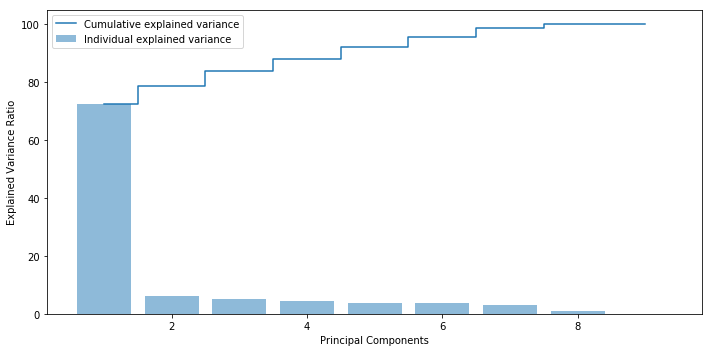

In [39]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [40]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 2 PCA dimensions (dimensionality reduction from 9 to 3)

pca = PCA(n_components=3)
data_reduced = pca.fit_transform(X_sd)
data_reduced.transpose()

array([[-1.52992351,  1.90686492, -1.65553455, ...,  3.74188242,
         3.14796073,  3.87270507],
       [ 0.6544217 , -0.48550325, -0.00924109, ..., -0.85815706,
        -1.41400254, -1.57397089],
       [ 0.02367714, -1.52693352, -0.11141351, ...,  1.91824   ,
         0.66850761,  0.83622909]])

# Q10 Find correlation between components and features

In [0]:
# df3= pd.DataFrame(pca.components_ , columns = X.column )

In [41]:
# Loadings or Eigen vectors on the PCA components
pca.components_

array([[ 0.31135982,  0.38080339,  0.37828466,  0.34783358,  0.35977716,
         0.34545881,  0.35221228,  0.34802511, -0.        ],
       [ 0.91761332, -0.02998547,  0.02537469, -0.25586199, -0.15927005,
        -0.04263257, -0.20965436, -0.14084745, -0.        ],
       [-0.07095184,  0.31973329,  0.27947826, -0.46559619,  0.15827807,
        -0.67045897,  0.02666288,  0.35010064, -0.        ]])

In [42]:
pd.DataFrame(pca.components_ ,columns = df1.iloc[:,1:10].columns)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.311360,0.380803,0.378285,0.347834,0.359777,0.345459,0.352212,0.348025,-0.0
1,0.917613,-0.029985,0.025375,-0.255862,-0.159270,-0.042633,-0.209654,-0.140847,-0.0
2,-0.070952,0.319733,0.279478,-0.465596,0.158278,-0.670459,0.026663,0.350101,-0.0


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [43]:
jokes = pd.read_csv("jokes.csv")
jokes.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [44]:
ratings = jokes.head(200).iloc[:,1:101]
ratings.shape

(200, 100)

In [45]:
ratings.head(10)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q13 Change the column indices from 0 to 99

In [46]:
ratings.columns = range(100)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [47]:
ratings = ratings.replace(99.00,0)
ratings.shape

(200, 100)

# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ratings_diff = sc.fit_transform(ratings)

In [51]:
#pd.Dataframe(ratings_diff1 , columns = ratings_diff.columns)
ratings_diff =pd.DataFrame(ratings_diff)
ratings_diff.head(5)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [58]:
rank = ratings_diff.mean().sort_values(ascending = False)


In [59]:
rank = pd.DataFrame(rank)

In [61]:
rank.head(10)

,0
98,1.840889e-16
81,1.243450e-16
97,1.198694e-16
20,1.065814e-16
94,1.054712e-16
92,8.770762e-17
47,7.771561e-17
73,7.743806e-17
99,7.549517e-17
49,7.494005e-17
